## Imports

In [5]:
import pandas as pd
import spacy
import re
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import pipeline
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

## Utilities

In [6]:
nlp = spacy.load("en_core_web_sm")
nltk.download('vader_lexicon', quiet=False)

#Cleans sentences
def clean_sentence(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    return sentence

#Cleans and Lemmatise sentences
def lemmatize_sentence(sentence):
    doc = nlp(clean_sentence(sentence))
    lemmatized_words = [token.lemma_ for token in doc]
    return " ".join(lemmatized_words)

#converts labels to match the test set
def map_hf_sentiment(hf_label):
    if hf_label == 'POSITIVE':
       return 'positive'
    elif hf_label == 'NEGATIVE':
       return 'negative'
    else:
       return 'neutral'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Data

### Loading

In [7]:
df = pd.read_table('sentiment-topic-test.tsv')
display(df.head())


,sentence_id,sentence,sentiment,topic
0,0,The stadium was alive with the roar of the cro...,positive,sports
1,1,That last-minute goal had me jumping out of my...,positive,sports
2,2,I couldn’t put the book down; it swept me into...,positive,book
3,3,"The story had its moments, though some parts f...",neutral,book
4,4,"I enjoyed the way the timelines shifted, even ...",neutral,book


### Preparation

In [8]:
df['cleaned_sentence'] = df['sentence'].apply(clean_sentence)
df['lemmatized_sentence'] = df['sentence'].apply(lemmatize_sentence)
display(df.head())

,sentence_id,sentence,sentiment,topic,cleaned_sentence,lemmatized_sentence
0,0,The stadium was alive with the roar of the cro...,positive,sports,the stadium was alive with the roar of the cro...,the stadium be alive with the roar of the crow...
1,1,That last-minute goal had me jumping out of my...,positive,sports,that lastminute goal had me jumping out of my ...,that lastminute goal have I jump out of my sea...
2,2,I couldn’t put the book down; it swept me into...,positive,book,i couldnt put the book down it swept me into a...,I could not put the book down it sweep I into ...
3,3,"The story had its moments, though some parts f...",neutral,book,the story had its moments though some parts fe...,the story have its moment though some part fee...
4,4,"I enjoyed the way the timelines shifted, even ...",neutral,book,i enjoyed the way the timelines shifted even i...,I enjoy the way the timeline shift even if it ...


###  Visualization

In [9]:
## FIXEME add visualization of the data
"""
 precision    recall  f1-score   support

    negative       0.60      1.00      0.75         6
     neutral       0.00      0.00      0.00         6
    positive       0.75      1.00      0.86         6

    accuracy                           0.67        18
   macro avg       0.45      0.67      0.54        18
weighted avg       0.45      0.67      0.54        18"""


'\n precision    recall  f1-score   support\n\n    negative       0.60      1.00      0.75         6\n     neutral       0.00      0.00      0.00         6\n    positive       0.75      1.00      0.86         6\n\n    accuracy                           0.67        18\n   macro avg       0.45      0.67      0.54        18\nweighted avg       0.45      0.67      0.54        18'

## Transformer

### Lemmatized

#### Running

In [10]:
sentiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest', tokenizer='cardiffnlp/twitter-roberta-base-sentiment')
display(df.head())

df['transformer_sentiment_label_lemmatized'] = df['lemmatized_sentence'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
df['transformer_sentiment_score_lemmatized'] = df['lemmatized_sentence'].apply(lambda x: sentiment_pipeline(x)[0]['score'])
display(df.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


,sentence_id,sentence,sentiment,topic,cleaned_sentence,lemmatized_sentence
0,0,The stadium was alive with the roar of the cro...,positive,sports,the stadium was alive with the roar of the cro...,the stadium be alive with the roar of the crow...
1,1,That last-minute goal had me jumping out of my...,positive,sports,that lastminute goal had me jumping out of my ...,that lastminute goal have I jump out of my sea...
2,2,I couldn’t put the book down; it swept me into...,positive,book,i couldnt put the book down it swept me into a...,I could not put the book down it sweep I into ...
3,3,"The story had its moments, though some parts f...",neutral,book,the story had its moments though some parts fe...,the story have its moment though some part fee...
4,4,"I enjoyed the way the timelines shifted, even ...",neutral,book,i enjoyed the way the timelines shifted even i...,I enjoy the way the timeline shift even if it ...


,sentence_id,sentence,sentiment,topic,cleaned_sentence,lemmatized_sentence,transformer_sentiment_label_lemmatized,transformer_sentiment_score_lemmatized
0,0,The stadium was alive with the roar of the cro...,positive,sports,the stadium was alive with the roar of the cro...,the stadium be alive with the roar of the crow...,positive,0.961645
1,1,That last-minute goal had me jumping out of my...,positive,sports,that lastminute goal had me jumping out of my ...,that lastminute goal have I jump out of my sea...,positive,0.931331
2,2,I couldn’t put the book down; it swept me into...,positive,book,i couldnt put the book down it swept me into a...,I could not put the book down it sweep I into ...,positive,0.908785
3,3,"The story had its moments, though some parts f...",neutral,book,the story had its moments though some parts fe...,the story have its moment though some part fee...,neutral,0.565785
4,4,"I enjoyed the way the timelines shifted, even ...",neutral,book,i enjoyed the way the timelines shifted even i...,I enjoy the way the timeline shift even if it ...,positive,0.658174


#### Evaluation


Transformer Model Evaluation:
Accuracy: 0.8333

Classification Report:


,precision,recall,f1-score,support
negative,1.000000,0.833333,0.909091,6.000000
neutral,0.800000,0.666667,0.727273,6.000000
positive,0.750000,1.000000,0.857143,6.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.850000,0.833333,0.831169,18.000000
weighted avg,0.850000,0.833333,0.831169,18.000000


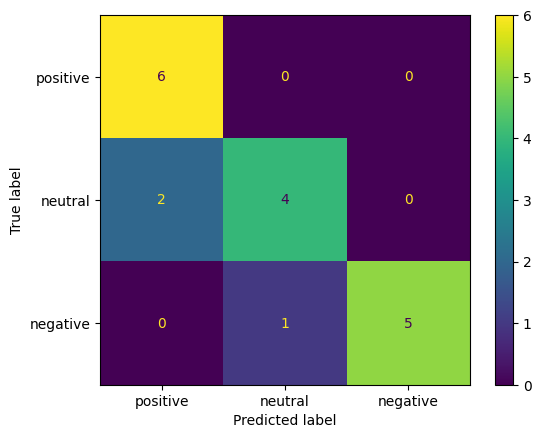

In [11]:
print("\nTransformer Model Evaluation:")
print(f"Accuracy: {accuracy_score(df['sentiment'], df['transformer_sentiment_label_lemmatized']):.4f}")
print("\nClassification Report:")
report_dict = classification_report(df['sentiment'], df['transformer_sentiment_label_lemmatized'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df)

cm = confusion_matrix(df['sentiment'], df['transformer_sentiment_label_lemmatized'], labels=['positive', 'neutral', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
disp.plot()
plt.show()

### Without Lemmatization

#### Running

In [12]:
sentiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest', tokenizer='cardiffnlp/twitter-roberta-base-sentiment')
display(df.head())

df['transformer_sentiment_label_cleaned'] = df['cleaned_sentence'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
df['transformer_sentiment_score_cleaned'] = df['cleaned_sentence'].apply(lambda x: sentiment_pipeline(x)[0]['score'])
display(df.head())


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


,sentence_id,sentence,sentiment,topic,cleaned_sentence,lemmatized_sentence,transformer_sentiment_label_lemmatized,transformer_sentiment_score_lemmatized
0,0,The stadium was alive with the roar of the cro...,positive,sports,the stadium was alive with the roar of the cro...,the stadium be alive with the roar of the crow...,positive,0.961645
1,1,That last-minute goal had me jumping out of my...,positive,sports,that lastminute goal had me jumping out of my ...,that lastminute goal have I jump out of my sea...,positive,0.931331
2,2,I couldn’t put the book down; it swept me into...,positive,book,i couldnt put the book down it swept me into a...,I could not put the book down it sweep I into ...,positive,0.908785
3,3,"The story had its moments, though some parts f...",neutral,book,the story had its moments though some parts fe...,the story have its moment though some part fee...,neutral,0.565785
4,4,"I enjoyed the way the timelines shifted, even ...",neutral,book,i enjoyed the way the timelines shifted even i...,I enjoy the way the timeline shift even if it ...,positive,0.658174


,sentence_id,sentence,sentiment,topic,cleaned_sentence,lemmatized_sentence,transformer_sentiment_label_lemmatized,transformer_sentiment_score_lemmatized,transformer_sentiment_label_cleaned,transformer_sentiment_score_cleaned
0,0,The stadium was alive with the roar of the cro...,positive,sports,the stadium was alive with the roar of the cro...,the stadium be alive with the roar of the crow...,positive,0.961645,positive,0.976611
1,1,That last-minute goal had me jumping out of my...,positive,sports,that lastminute goal had me jumping out of my ...,that lastminute goal have I jump out of my sea...,positive,0.931331,positive,0.945976
2,2,I couldn’t put the book down; it swept me into...,positive,book,i couldnt put the book down it swept me into a...,I could not put the book down it sweep I into ...,positive,0.908785,positive,0.968490
3,3,"The story had its moments, though some parts f...",neutral,book,the story had its moments though some parts fe...,the story have its moment though some part fee...,neutral,0.565785,negative,0.518248
4,4,"I enjoyed the way the timelines shifted, even ...",neutral,book,i enjoyed the way the timelines shifted even i...,I enjoy the way the timeline shift even if it ...,positive,0.658174,positive,0.800906


#### Evaluation


Transformer Model Evaluation:
Accuracy: 0.7778

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83         6
     neutral       0.75      0.50      0.60         6
    positive       0.75      1.00      0.86         6

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.76        18
weighted avg       0.78      0.78      0.76        18



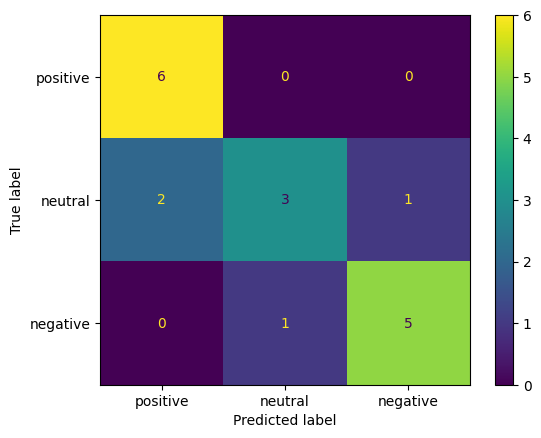

In [13]:
print("\nTransformer Model Evaluation:")
print(f"Accuracy: {accuracy_score(df['sentiment'], df['transformer_sentiment_label_cleaned']):.4f}")
print("\nClassification Report:")
print(classification_report(df['sentiment'], df['transformer_sentiment_label_cleaned']))

cm = confusion_matrix(df['sentiment'], df['transformer_sentiment_label_cleaned'], labels=['positive', 'neutral', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
disp.plot()
plt.show()

## Vader - Lexicon

### Initialization

In [14]:
vaderModel = SentimentIntensityAnalyzer()

### Lemmatized

In [15]:
df['vader_score_lemmatized'] = df['lemmatized_sentence'].apply(lambda x: vaderModel.polarity_scores(x)['compound'])
df['vader_pred_lemmatized'] = df['vader_score_lemmatized'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')

### Evaluation

Accuracy: 0.3888888888888889

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.33      0.50         6
     neutral       0.33      0.33      0.33         6
    positive       0.30      0.50      0.38         6

    accuracy                           0.39        18
   macro avg       0.54      0.39      0.40        18
weighted avg       0.54      0.39      0.40        18



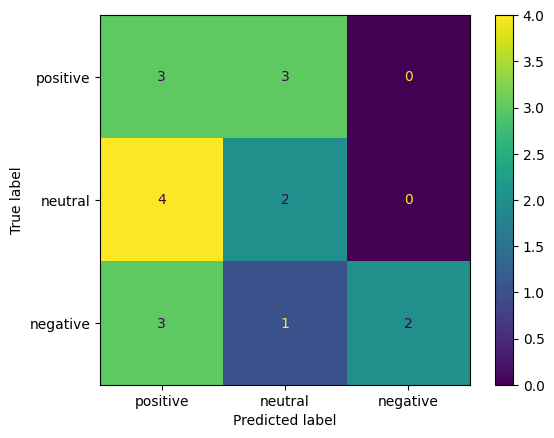

In [16]:
print("Accuracy:", accuracy_score(df['sentiment'], df['vader_pred_lemmatized']))
print("\nClassification Report:\n", classification_report(df['sentiment'], df['vader_pred_lemmatized']))

cm = confusion_matrix(df['sentiment'], df['vader_pred_lemmatized'], labels=['positive', 'neutral', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
disp.plot()
plt.show()

### Without Lemmitization

### Lemmatized

In [17]:
df['vader_score_cleaned'] = df['cleaned_sentence'].apply(lambda x: vaderModel.polarity_scores(x)['compound'])
df['vader_pred_cleaned'] = df['vader_score_cleaned'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')

### Evaluation

Accuracy: 0.2777777777777778

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.17      0.29         6
     neutral       0.20      0.17      0.18         6
    positive       0.25      0.50      0.33         6

    accuracy                           0.28        18
   macro avg       0.48      0.28      0.27        18
weighted avg       0.48      0.28      0.27        18



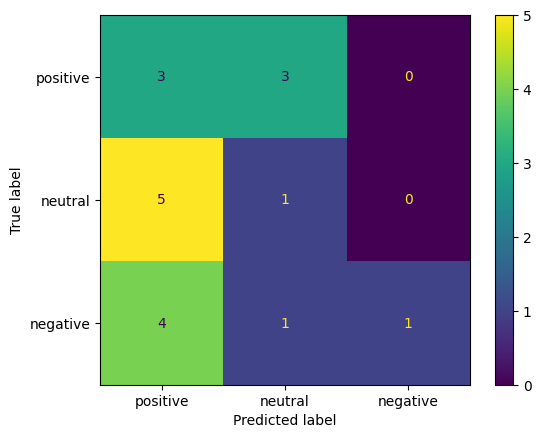

In [18]:
print("Accuracy:", accuracy_score(df['sentiment'], df['vader_pred_cleaned']))
print("\nClassification Report:\n", classification_report(df['sentiment'], df['vader_pred_cleaned']))

cm = confusion_matrix(df['sentiment'], df['vader_pred_cleaned'], labels=['positive', 'neutral', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
disp.plot()
plt.show()